In [253]:
from shapely.geometry import Point
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import folium
from folium.plugins import MarkerCluster
from folium.plugins import FastMarkerCluster
from shapely.geometry import Point

In [254]:
Der_911=pd.read_csv('../data/911_Phone Calls_Derecho_050320_050420.csv')
Tor_911=pd.read_csv('../data/911_Phone_Calls_Tornado_030320.csv')
Der_incident=pd.read_csv('../data/Computer Aided Dispatch Data_Derecho Incidents 050320-050420.csv')
Tor_incident=pd.read_csv('../data/Computer Aided Dispatch Data_Tornado Incidents 030320.csv')

In [255]:
Der_911.head(2)


,Seizure DateTime,CallTypeId,ALI Latitude,ALI Longitude,Cell Tower Address
0,5/3/2020 16:30,911 Calls,36.247802,-86.716847,WIRELESS CALLER
1,5/3/2020 16:30,911 Calls,36.143108,-86.800621,1161 21ST AV S - SE


In [256]:
Der_911=Der_911.rename(columns={'Seizure DateTime':'time','CallTypeId':'call_id','ALI Latitude':'lat','ALI Longitude':'lng','Cell Tower Address':'address' })

In [257]:
Der_911

,time,call_id,lat,lng,address
0,5/3/2020 16:30,911 Calls,36.247802,-86.716847,WIRELESS CALLER
1,5/3/2020 16:30,911 Calls,36.143108,-86.800621,1161 21ST AV S - SE
2,5/3/2020 16:30,911 Calls,36.100516,-87.056329,8013 C MCCRORY LN - N
3,5/3/2020 16:30,911 Calls,36.130021,-86.927819,5758 RIVER RD - SW
4,5/3/2020 16:31,911 Calls,36.142380,-86.881882,3744B ANNEX AVE - SE
...,...,...,...,...,...
1543,5/4/2020 0:16,911 Calls,36.067911,-86.622970,WIRELESS CALLER
1544,5/4/2020 0:18,911 Calls,36.131694,-86.770535,1823-C 12TH AV - SECTOR SE S
1545,5/4/2020 0:22,911 Calls,36.042237,-86.743455,5244-C EDMONSON PIKE - SECTOR SE
1546,5/4/2020 0:25,911 Calls,36.077664,-86.655607,2747-B MURFREESBORO PKE - SECTOR NW


In [258]:
Der_911['geometry']=Der_911.apply(lambda x: Point((float(x.lng), 
                                                         float(x.lat))), 
                                        axis=1)
Der_911.head(3)

,time,call_id,lat,lng,address,geometry
0,5/3/2020 16:30,911 Calls,36.247802,-86.716847,WIRELESS CALLER,POINT (-86.716847 36.247802)
1,5/3/2020 16:30,911 Calls,36.143108,-86.800621,1161 21ST AV S - SE,POINT (-86.80062100000001 36.143108)
2,5/3/2020 16:30,911 Calls,36.100516,-87.056329,8013 C MCCRORY LN - N,POINT (-87.05632900000001 36.100516)


In [259]:
Der_911_geo=gpd.GeoDataFrame(Der_911)
type(Der_911_geo)

geopandas.geodataframe.GeoDataFrame

<AxesSubplot:>

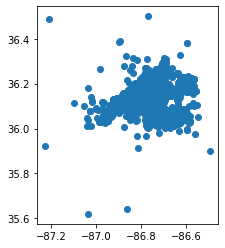

In [298]:
Der_911_geo.plot()

In [261]:
Der_911.time =Der_911.time.astype("datetime64")
Der_911

,time,call_id,lat,lng,address,geometry
0,2020-05-03 16:30:00,911 Calls,36.247802,-86.716847,WIRELESS CALLER,POINT (-86.71685 36.24780)
1,2020-05-03 16:30:00,911 Calls,36.143108,-86.800621,1161 21ST AV S - SE,POINT (-86.80062 36.14311)
2,2020-05-03 16:30:00,911 Calls,36.100516,-87.056329,8013 C MCCRORY LN - N,POINT (-87.05633 36.10052)
3,2020-05-03 16:30:00,911 Calls,36.130021,-86.927819,5758 RIVER RD - SW,POINT (-86.92782 36.13002)
4,2020-05-03 16:31:00,911 Calls,36.142380,-86.881882,3744B ANNEX AVE - SE,POINT (-86.88188 36.14238)
...,...,...,...,...,...,...
1543,2020-05-04 00:16:00,911 Calls,36.067911,-86.622970,WIRELESS CALLER,POINT (-86.62297 36.06791)
1544,2020-05-04 00:18:00,911 Calls,36.131694,-86.770535,1823-C 12TH AV - SECTOR SE S,POINT (-86.77053 36.13169)
1545,2020-05-04 00:22:00,911 Calls,36.042237,-86.743455,5244-C EDMONSON PIKE - SECTOR SE,POINT (-86.74345 36.04224)
1546,2020-05-04 00:25:00,911 Calls,36.077664,-86.655607,2747-B MURFREESBORO PKE - SECTOR NW,POINT (-86.65561 36.07766)


<AxesSubplot:xlabel='time'>

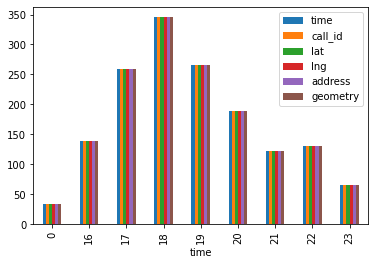

In [262]:
Der_911.groupby(Der_911.time.dt.hour).count().plot(kind='bar')


<AxesSubplot:>

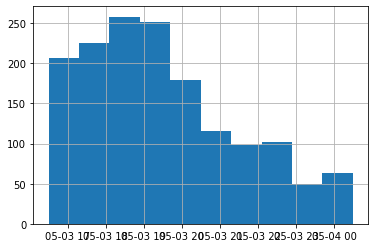

In [263]:
Der_911.time.hist()

<AxesSubplot:>

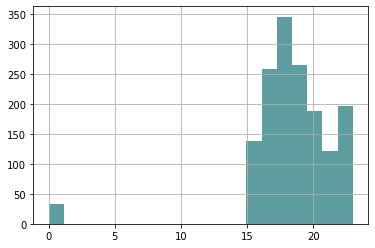

In [264]:
Der_911.time.dt.hour.hist(bins=20,color='cadetblue')

In [265]:
Der_911.time.dt.hour.value_counts()

18    346
19    265
17    259
20    189
16    138
22    131
21    122
23     65
0      33
Name: time, dtype: int64

In [266]:
Der_911_firstcall=Der_911.sort_values(by=['time']).head(1)
Der_911_firstcall

,time,call_id,lat,lng,address,geometry
0,2020-05-03 16:30:00,911 Calls,36.247802,-86.716847,WIRELESS CALLER,POINT (-86.71685 36.24780)


In [267]:
Der_911_lastcall=Der_911.sort_values(by=['time']).tail(1)
Der_911_lastcall

,time,call_id,lat,lng,address,geometry
1547,2020-05-04 00:29:00,911 Calls,36.024706,-86.743562,302 SUMMIT VIEW DR - E,POINT (-86.74356 36.02471)


In [268]:
Der_firstlast=pd.concat([Der_911_firstcall,Der_911_lastcall])
Der_firstlast

,time,call_id,lat,lng,address,geometry
0,2020-05-03 16:30:00,911 Calls,36.247802,-86.716847,WIRELESS CALLER,POINT (-86.71685 36.24780)
1547,2020-05-04 00:29:00,911 Calls,36.024706,-86.743562,302 SUMMIT VIEW DR - E,POINT (-86.74356 36.02471)


In [269]:
Der_firstlast

,time,call_id,lat,lng,address,geometry
0,2020-05-03 16:30:00,911 Calls,36.247802,-86.716847,WIRELESS CALLER,POINT (-86.71685 36.24780)
1547,2020-05-04 00:29:00,911 Calls,36.024706,-86.743562,302 SUMMIT VIEW DR - E,POINT (-86.74356 36.02471)


In [270]:
folium.GeoJson(zipcodes).add_to(mapDer_911)
for row_index,rwo_values in Der_firstlast.iterrows()
 loc = [row_values['lat'], row_values['lng']]
    pop = str(row_values['time'])
    icon=folium.Icon(color="blue",icon="phone", prefix='fa')
    
    marker = folium.Marker(
        location = loc, 
        popup = pop,
    icon = icon) 
    
    marker.add_to(mapDer_911)
mapDer_911

                            

SyntaxError: invalid syntax (Temp/ipykernel_26036/1135669450.py, line 2)

In [300]:
counnt_center=[36.166,-86.78]
davidson_map=folium.maplocation=county_center,zoom_start=12

for row_index, row_values in Der_911_geo.iterrows():

    loc = [row_values['lat'], row_values['lng']]
    pop = str(row_values['time'])
    icon=folium.Icon(color="red",icon="marker", prefix='fa')
    
    marker = folium.Marker(
        location = loc, 
        popup = pop, icon = icon) 

    marker.add_to(davidson_map)

davidson_map

TypeError: cannot unpack non-iterable int object

In [272]:
Der_911_geo['address'].value_counts()

WIRELESS CALLER                  336
WIRELESS 911 CALLER               16
3009D DARRINGTON WAY - N          15
4400 HARDING PIKE - E             15
3333 LEBANON PIKE - N             14
                                ... 
9005 NEWSOM STATION RD - N         1
2167 BROOKVIEW DR - SE Sector      1
8353 HIGHWAY 100                   1
701B STEWARTS FERRY PIKE - SE      1
2014 QUAIL HOLLOW CIR              1
Name: address, Length: 630, dtype: int64

In [273]:
Der_911_geo_address = Der_911_geo.loc[Der_911_geo['address']=='WIRELESS CALLER']
Der_911_geo.shape

(1548, 6)

In [274]:
Tor_911.head(5)

,Seizure DateTime,CallTypeId,ALI Latitude,ALI Longitude,Cell Tower Address
0,3/3/2020 0:34,911 Calls,36.072708,-86.665779,620 Richards RD - N Sector
1,3/3/2020 0:36,911 Calls,36.159634,-86.841904,4507D KENTUCKY AV - SE
2,3/3/2020 0:36,911 Calls,36.264153,-86.708862,329 THELMA ST - S Sector
3,3/3/2020 0:36,911 Calls,36.156970,-86.880736,526 FOUNDRY DR
4,3/3/2020 0:36,911 Calls,36.178839,-86.692286,5007B RUSKIN AVE - N


In [275]:
Tor_911=Tor_911.rename(columns={'Seizure DateTime':'date','CallTypeId':'call_id','ALI Latitude':'lat','ALI Longitude':'lng','Cell Tower Address':'address' })

In [276]:
Tor_911

,date,call_id,lat,lng,address
0,3/3/2020 0:34,911 Calls,36.072708,-86.665779,620 Richards RD - N Sector
1,3/3/2020 0:36,911 Calls,36.159634,-86.841904,4507D KENTUCKY AV - SE
2,3/3/2020 0:36,911 Calls,36.264153,-86.708862,329 THELMA ST - S Sector
3,3/3/2020 0:36,911 Calls,36.156970,-86.880736,526 FOUNDRY DR
4,3/3/2020 0:36,911 Calls,36.178839,-86.692286,5007B RUSKIN AVE - N
...,...,...,...,...,...
470,3/3/2020 4:54,911 Calls,36.142552,-86.635330,WIRELESS CALLER
471,3/3/2020 4:54,911 Calls,36.189415,-86.813557,WIRELESS CALLER
472,3/3/2020 4:55,911 Calls,36.223534,-86.757874,WIRELESS CALLER
473,3/3/2020 4:56,911 Calls,36.168398,-86.783774,600 DR MARTIN L KING JR BLVD - NE


In [277]:
Tor_911['geometry']=Tor_911.apply(lambda x: Point((float(x.lng), 
                                                         float(x.lat))), 
                                        axis=1)
Tor_911.head(3)

,date,call_id,lat,lng,address,geometry
0,3/3/2020 0:34,911 Calls,36.072708,-86.665779,620 Richards RD - N Sector,POINT (-86.665779 36.072708)
1,3/3/2020 0:36,911 Calls,36.159634,-86.841904,4507D KENTUCKY AV - SE,POINT (-86.841904 36.159634)
2,3/3/2020 0:36,911 Calls,36.264153,-86.708862,329 THELMA ST - S Sector,POINT (-86.708862 36.264153)


In [278]:
Tor_911_geo=gpd.GeoDataFrame(Tor_911)
type(Tor_911_geo)


geopandas.geodataframe.GeoDataFrame

<AxesSubplot:>

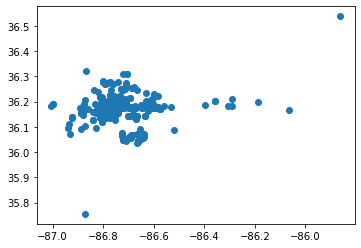

In [279]:
Tor_911_geo.plot()

In [280]:
## 5/3/2020 4:30:00 PM  To:  5/4/2020 12:30:00 

Der_incident.head(5)

,IncidentDate,Location,Latitude1,Longitude1,IncidentTypeDescription1
0,5/3/2020 16:31,901 KENWICK CT W,36.046877,-86.962526,ELECTRICAL HAZARD
1,5/3/2020 16:32,8036 ARBOR DR,36.082491,-86.940680,ELECTRICAL HAZARD
2,5/3/2020 16:32,119 DUE WEST AV E,36.248029,-86.716875,NOT ALERT COPD
3,5/3/2020 16:33,630 GALLATIN PKE S,36.256491,-86.714817,ABDOMINAL PAIN
4,5/3/2020 16:33,615 W HILLWOOD DR,36.129690,-86.879834,ELECTRICAL HAZARD


In [281]:
Der_incident=Der_incident.rename(columns={'incidentDate':'date','Latitude1':'lat','Longitude1':'lng','Location':'location','IncidentTypeDescription1':'description'})

In [282]:
Der_incident.head(2)

,IncidentDate,location,lat,lng,description
0,5/3/2020 16:31,901 KENWICK CT W,36.046877,-86.962526,ELECTRICAL HAZARD
1,5/3/2020 16:32,8036 ARBOR DR,36.082491,-86.940680,ELECTRICAL HAZARD


In [283]:
Der_incident['geometry']=Der_incident.apply(lambda x: Point((float(x.lng), 
                                                         float(x.lat))), 
                                        axis=1)
Der_incident.head(3)

,IncidentDate,location,lat,lng,description,geometry
0,5/3/2020 16:31,901 KENWICK CT W,36.046877,-86.962526,ELECTRICAL HAZARD,POINT (-86.96252641 36.04687715)
1,5/3/2020 16:32,8036 ARBOR DR,36.082491,-86.940680,ELECTRICAL HAZARD,POINT (-86.94067952 36.08249081)
2,5/3/2020 16:32,119 DUE WEST AV E,36.248029,-86.716875,NOT ALERT COPD,POINT (-86.71687484 36.24802948)


In [284]:
##From: 3/3/2020 12:30:00 AM  To:  3/3/2020 5:00:00 AM
Tor_incident.head()

,IncidentDate,Location,Latitude1,Longitude1,IncidentTypeDescription1
0,3/3/2020 0:36,6205 COCKRILL BEND CIR,36.182002,-86.894052,GENERAL ALARM COMMERCIAL INDUSTRIAL BUILD
1,3/3/2020 0:37,7337 COCKRILL BEND BLVD,36.175666,-86.894978,GENERAL ALARM COMMERCIAL INDUSTRIAL BUILD
2,3/3/2020 0:38,110 TUNE AIRPORT DR,36.179299,-86.883727,STRUCTURE FIRE COMMERCIAL INDUSTRIAL
3,3/3/2020 0:39,555 MARRIOTT DR,36.151108,-86.689921,GENERAL ALARM COMMERCIAL INDUSTRIAL BUILD
4,3/3/2020 0:39,1414 COUNTY HOSPITAL RD,36.177926,-86.845934,GENERAL ALARM COMMERCIAL INDUSTRIAL BUILD


In [285]:
     Tor_incident=Tor_incident.rename(columns={'incidentDate':'date','Latitude1':'lat','Longitude1':'lng','Location':'location','IncidentTypeDescription1':'description'})                              

In [286]:
     Tor_incident.head(2)
                      

,IncidentDate,location,lat,lng,description
0,3/3/2020 0:36,6205 COCKRILL BEND CIR,36.182002,-86.894052,GENERAL ALARM COMMERCIAL INDUSTRIAL BUILD
1,3/3/2020 0:37,7337 COCKRILL BEND BLVD,36.175666,-86.894978,GENERAL ALARM COMMERCIAL INDUSTRIAL BUILD


In [287]:
Tor_incident['geometry']=Tor_incident.apply(lambda x: Point((float(x.lng), 
                                                         float(x.lat))), 
                                        axis=1)
Tor_incident.head(3)

,IncidentDate,location,lat,lng,description,geometry
0,3/3/2020 0:36,6205 COCKRILL BEND CIR,36.182002,-86.894052,GENERAL ALARM COMMERCIAL INDUSTRIAL BUILD,POINT (-86.89405212 36.18200191)
1,3/3/2020 0:37,7337 COCKRILL BEND BLVD,36.175666,-86.894978,GENERAL ALARM COMMERCIAL INDUSTRIAL BUILD,POINT (-86.89497756999999 36.175666)
2,3/3/2020 0:38,110 TUNE AIRPORT DR,36.179299,-86.883727,STRUCTURE FIRE COMMERCIAL INDUSTRIAL,POINT (-86.8837274 36.17929946)


In [289]:
damage_point=gpd.read_file('../data/damage_points.geojson')
path_polygon=gpd.read_file('../data/path_polygons.geojson')
tornado_path=gpd.read_file('../data/tornado_paths.geojson')


In [290]:
damage_point.head(2)


,objectid,stormdate,surveydate,event_id,damage,damage_txt,dod_txt,efscale,damage_dir,windspeed,...,device_id,qc,dod,surveytype,globalid,edit_user,edit_time,comments,path_guid,geometry
0,2047717,1583218620000,1583335680000,Mount Juliet,2,One- or Two-Family Residences (FR12),All walls collapsed,EF3,N/A,155,...,None,Y,9,None,{FE82BBAC-ABF8-4562-81F6-A527829FBFFE},None,None,none,None,POINT (-86.51628 36.18344)
1,2047909,1583221860000,1583437860000,Cookeville,27,Trees: Hardwood (TH),Trees uprooted,EF0,N/A,80,...,None,Y,3,None,{2417B433-0C00-4D6C-A059-45E0CFDA2AF6},None,None,none,None,POINT (-85.60552 36.17308)


<AxesSubplot:>

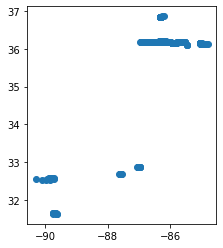

In [291]:
damage_point.plot()

In [292]:
path_polygon.head()

,efscale,geometry
0,EF3,"POLYGON ((-85.59922 36.17660, -85.59840 36.176..."
1,EF1,"POLYGON ((-85.52390 36.17189, -85.52430 36.171..."
2,EF1,"POLYGON ((-85.61527 36.17529, -85.61403 36.175..."
3,EF3,"POLYGON ((-85.55185 36.17398, -85.55184 36.173..."
4,EF0,"POLYGON ((-86.94788 36.17248, -86.94582 36.172..."


<AxesSubplot:>

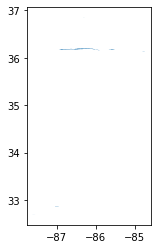

In [294]:
path_polygon.plot()

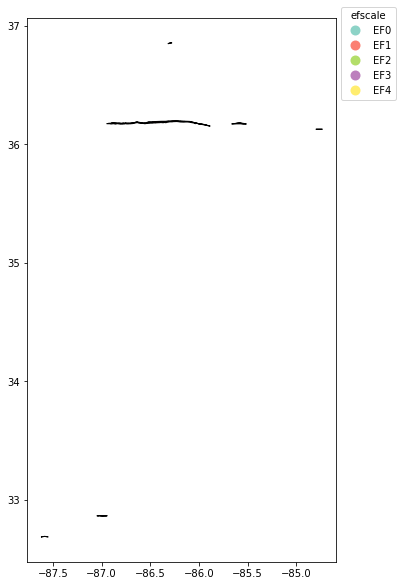

In [297]:
leg_kwds = {'title': 'efscale', 'loc': 'upper left', 
            'bbox_to_anchor': (1, 1.03), 'ncol': 1}

path_polygon.plot(column ='efscale', figsize=(10, 10),
              edgecolor = 'black',
              legend = True, legend_kwds = leg_kwds, 
              cmap = 'Set3')
plt.show()

In [295]:
tornado_path.head()

,objectid,event_id,stormdate,starttime,endtime,startlat,startlon,endlat,endlon,length,...,propdamage,edit_user,edit_time,created_user,created_date,last_edited_user,last_edited_date,comments,Shape__Length,geometry
0,879879,Nashville,1583217120000,1583217120000,1583220900000,36.1725,-86.9478,36.1532,-85.8860,60.1317,...,-99,None,None,DATians,1583461561000,dat_editor,1618703241000,"An historic, long-track, strong EF-3 tornado b...",1.071075,"LINESTRING (-86.94783 36.17249, -86.94461 36.1..."
1,879077,Hwy 69 Ballpark Tornado,1583237040000,1583237040000,1583237520000,32.6846,-87.6226,32.6863,-87.5492,4.3400,...,-99,None,None,DATians,1583353305000,DATians,1583358165000,None,0.074159,"LINESTRING (-87.62263 32.68464, -87.62182 32.6..."
2,879081,Lawley Tornado,1583238480000,1583238480000,1583239080000,32.8648,-87.0496,32.8646,-86.9432,6.2100,...,-99,None,None,DATians,1583357522000,DATians,1583359203000,Path,0.106695,"LINESTRING (-87.04956 32.86476, -87.04019 32.8..."
3,879877,Cookeville,1583221680000,1583221680000,1583222160000,36.1715,-85.6628,36.1709,-85.5135,8.3900,...,100000,None,None,DATians,1583461208000,DATians,1590771008000,"An historic, violent EF-4 tornado began in wes...",0.149870,"LINESTRING (-85.66285 36.17151, -85.61103 36.1..."
4,879878,Goffton,1583222700000,1583222700000,1583222760000,36.1075,-85.4461,36.1068,-85.4420,0.2300,...,-99,None,None,DATians,1583461360000,DATians,1590604073000,A very brief and weak EF-0 tornado touched dow...,0.004130,"LINESTRING (-85.44610 36.10746, -85.44203 36.1..."


<AxesSubplot:>

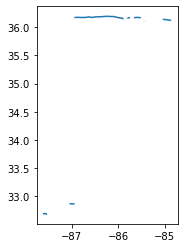

In [296]:
tornado_path.plot()